# **Data Science And Machine Learning Project - Liron Levi**

In [1]:
from IPython.display import Image

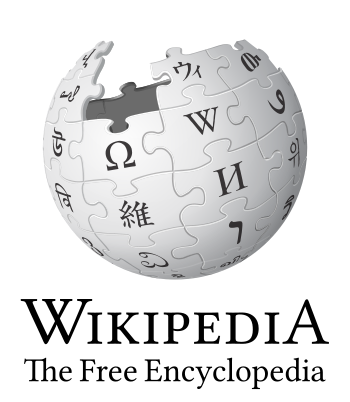

In [2]:
Image(filename='WIKI.png')

# **Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import seaborn as sns
import math
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Check out the Data**

In [4]:
WikiData = pd.read_csv('WikiDataSet.csv')

In [5]:
WikiData

Page_Title  \
0               Madrid Motor Show   
1               The Two Crusaders   
2                           Sligo   
3                     Sam Craigie   
4                      Piet Rinke   
...                           ...   
4576             September Affair   
4577  Sunnyside station (Toronto)   
4578    Kentucky Revised Statutes   
4579                Vérteskethely   
4580      Leonor Cortés Moctezuma   

                                                    URL  Num_Of_Pictures  \
0       https://en.wikipedia.org/wiki/Madrid_Motor_Show                1   
1       https://en.wikipedia.org/wiki/The_Two_Crusaders                2   
2                   https://en.wikipedia.org/wiki/Sligo               22   
3             https://en.wikipedia.org/wiki/Sam_Craigie                1   
4              https://en.wikipedia.org/wiki/Piet_Rinke                0   
...                                                 ...              ...   
4576     https://en.wikipedia.org/wiki/September_Affair                1   
4577  https://en.wikipedia.org/wiki/Sunnyside_statio...                7   
4578  https://en.wikipedia.org/wiki/Kentucky_Revised...                1   
4579   https://en.wikipedia.org/wiki/V%C3%A9rteskethely                5   
4580  https://en.wikipedia.org/wiki/Leonor_Cort%C3%A...                0   

      Num_Of_Languages  Num_Of_References  Num_Of_Contents  Num_Of_Tables  \
0                    2                  1                6              0   
1                    3                  3                5              0   
2                   52                 56               18              1   
3                    5                 25                6              4   
4                    2                  1                5              0   
...                ...                ...              ...            ...   
4576                 7                  4                6              0   
4577                 0                  0                6              1   
4578                 1                  0                0              0   
4579                15                  0                0              0   
4580                 4                  6                4              0   

      Num_Of_Categories  Num_Of_Redirects Views_In_30_Last_Days  \
0                     5                 0                    27   
1                    13                 2                    77   
2                     6                10                 9,282   
3                     4                 0                 1,312   
4                     9                 1                    29   
...                 ...               ...                   ...   
4576                 14                 0                   776   
4577                  8                 4                    26   
4578                  3                 8                   149   
4579                  2                 1                     9   
4580                  8                 1                 2,038   

      Avg_Views_Per_Day  Total_Views Num_Of_Edits  
0              5.738306        13617           25  
1              6.503582        15433           18  
2            388.820059       922670        2,429  
3             37.186262        88243          309  
4              3.359461         7972           38  
...                 ...          ...          ...  
4576          34.358618        81533           71  
4577           2.537716         6022           64  
4578          15.221660        36121           18  
4579           2.284029         5420           23  
4580          62.120523       147412           73  

[4581 rows x 13 columns]

In [6]:
WikiData.shape # Number of rows and columns

(4581, 13)

# **Preproccess**

### We are dropping the duplicates columns.

In [7]:
print("before: " , WikiData.duplicated().sum())

WikiData = WikiData.drop_duplicates(keep = 'first')

print("after: " , WikiData.duplicated().sum())

before:  4
after:  0


### We are dropping the columns that we are not going to use in our training model.

In [8]:
Pages = WikiData.iloc[:, 0]
Pages.head()

0    Madrid Motor Show
1    The Two Crusaders
2                Sligo
3          Sam Craigie
4           Piet Rinke
Name: Page_Title, dtype: object

In [9]:
WikiData = WikiData.drop(['Page_Title','URL'],axis=1)

In [10]:
WikiData.head()

Num_Of_Pictures  Num_Of_Languages  Num_Of_References  Num_Of_Contents  \
0                1                 2                  1                6   
1                2                 3                  3                5   
2               22                52                 56               18   
3                1                 5                 25                6   
4                0                 2                  1                5   

   Num_Of_Tables  Num_Of_Categories  Num_Of_Redirects Views_In_30_Last_Days  \
0              0                  5                 0                    27   
1              0                 13                 2                    77   
2              1                  6                10                 9,282   
3              4                  4                 0                 1,312   
4              0                  9                 1                    29   

   Avg_Views_Per_Day  Total_Views Num_Of_Edits  
0           5.738306        13617           25  
1           6.503582        15433           18  
2         388.820059       922670        2,429  
3          37.186262        88243          309  
4           3.359461         7972           38

### Both columns have been removed!

## **Check and Repair to numeric types**

In [11]:
WikiData.dtypes

Num_Of_Pictures            int64
Num_Of_Languages           int64
Num_Of_References          int64
Num_Of_Contents            int64
Num_Of_Tables              int64
Num_Of_Categories          int64
Num_Of_Redirects           int64
Views_In_30_Last_Days     object
Avg_Views_Per_Day        float64
Total_Views                int64
Num_Of_Edits              object
dtype: object

In [12]:
WikiData['Num_Of_Edits'] = pd.to_numeric(WikiData['Num_Of_Edits'], errors='coerce').fillna(0).astype(np.int64)
WikiData['Views_In_30_Last_Days'] = pd.to_numeric(WikiData['Views_In_30_Last_Days'], errors='coerce').fillna(0).astype(np.int64)

### Lets check it agian

In [13]:
WikiData.dtypes

Num_Of_Pictures            int64
Num_Of_Languages           int64
Num_Of_References          int64
Num_Of_Contents            int64
Num_Of_Tables              int64
Num_Of_Categories          int64
Num_Of_Redirects           int64
Views_In_30_Last_Days      int64
Avg_Views_Per_Day        float64
Total_Views                int64
Num_Of_Edits               int64
dtype: object

### We did it!

## **Check missing values**

In [14]:
WikiData.isnull().sum()

Num_Of_Pictures          0
Num_Of_Languages         0
Num_Of_References        0
Num_Of_Contents          0
Num_Of_Tables            0
Num_Of_Categories        0
Num_Of_Redirects         0
Views_In_30_Last_Days    0
Avg_Views_Per_Day        0
Total_Views              0
Num_Of_Edits             0
dtype: int64

### No data missing!

## **Check the columns info**

In [15]:
WikiData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4577 entries, 0 to 4580
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Num_Of_Pictures        4577 non-null   int64  
 1   Num_Of_Languages       4577 non-null   int64  
 2   Num_Of_References      4577 non-null   int64  
 3   Num_Of_Contents        4577 non-null   int64  
 4   Num_Of_Tables          4577 non-null   int64  
 5   Num_Of_Categories      4577 non-null   int64  
 6   Num_Of_Redirects       4577 non-null   int64  
 7   Views_In_30_Last_Days  4577 non-null   int64  
 8   Avg_Views_Per_Day      4577 non-null   float64
 9   Total_Views            4577 non-null   int64  
 10  Num_Of_Edits           4577 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.1 KB


## **Check Outliners**

In [16]:
WikiData.describe(include = 'all')

Num_Of_Pictures  Num_Of_Languages  Num_Of_References  Num_Of_Contents  \
count      4577.000000       4577.000000        4577.000000      4577.000000   
mean          2.797684          4.381910           8.467774         2.940135   
std           8.938854          9.092359          22.643229         3.406262   
min           0.000000          0.000000           0.000000         0.000000   
25%           1.000000          0.000000           1.000000         0.000000   
50%           2.000000          1.000000           3.000000         3.000000   
75%           3.000000          4.000000           8.000000         5.000000   
max         298.000000        150.000000         753.000000        52.000000   

       Num_Of_Tables  Num_Of_Categories  Num_Of_Redirects  \
count    4577.000000        4577.000000       4577.000000   
mean        0.676426           5.861918          1.671837   
std         3.169380           4.696951          4.401235   
min         0.000000           1.000000          0.000000   
25%         0.000000           3.000000          0.000000   
50%         0.000000           4.000000          1.000000   
75%         0.000000           8.000000          2.000000   
max       120.000000          58.000000        128.000000   

       Views_In_30_Last_Days  Avg_Views_Per_Day   Total_Views  Num_Of_Edits  
count            4577.000000        4577.000000  4.577000e+03   4577.000000  
mean              112.997160          37.763288  8.961228e+04     74.825868  
std               187.488135         217.446119  5.159996e+05    121.113015  
min                 0.000000           0.000421  1.000000e+00      0.000000  
25%                10.000000           2.164770  5.137000e+03     16.000000  
50%                33.000000           4.500211  1.067900e+04     34.000000  
75%               117.000000          13.014749  3.088400e+04     76.000000  
max               996.000000        7555.876106  1.793009e+07    994.000000

### Demonstration of the outliers in num_of_contents column

<AxesSubplot:xlabel='Num_Of_Contents'>

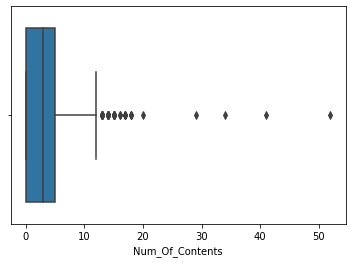

In [17]:
sns.boxplot(WikiData.Num_Of_Contents)

In [18]:
df2 = WikiData.copy()
print("Amount of rows in the column before clearing outliers: " , df2.Num_Of_Contents.count())

Amount of rows in the column before clearing outliers:  4577


### Clearing outliers

In [19]:
df2 = WikiData.copy()
df3 = WikiData.select_dtypes('number').copy()
num_cols = list(df3.columns) 
    
    
for col in num_cols:
    Q1 = np.percentile(df2[col], 20)
    Q3 = np.percentile(df2[col], 85)
    IQR = Q3 - Q1
    IQR_range = 1.5 * IQR
    df2.loc[(df2[col] < Q1 - IQR_range) | (df2[col] > Q3 + IQR_range), col] = np.nan
    

#היה פה 5 ו-95

In [20]:
print("Amount of rows in the column after clearing outliers: " , df2.Num_Of_Contents.count())


Amount of rows in the column after clearing outliers:  4563


<AxesSubplot:xlabel='Num_Of_Contents'>

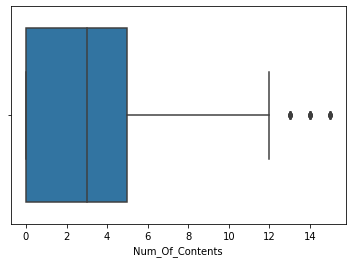

In [21]:
sns.boxplot(df2.Num_Of_Contents)

### Lets see the nulls in each column

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4577 entries, 0 to 4580
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Num_Of_Pictures        4431 non-null   float64
 1   Num_Of_Languages       4314 non-null   float64
 2   Num_Of_References      4327 non-null   float64
 3   Num_Of_Contents        4563 non-null   float64
 4   Num_Of_Tables          4318 non-null   float64
 5   Num_Of_Categories      4528 non-null   float64
 6   Num_Of_Redirects       4381 non-null   float64
 7   Views_In_30_Last_Days  4351 non-null   float64
 8   Avg_Views_Per_Day      4206 non-null   float64
 9   Total_Views            4206 non-null   float64
 10  Num_Of_Edits           4335 non-null   float64
dtypes: float64(11)
memory usage: 429.1 KB


### Drop all nulls

In [23]:
df2.dropna(axis=0, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3451 entries, 0 to 4580
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Num_Of_Pictures        3451 non-null   float64
 1   Num_Of_Languages       3451 non-null   float64
 2   Num_Of_References      3451 non-null   float64
 3   Num_Of_Contents        3451 non-null   float64
 4   Num_Of_Tables          3451 non-null   float64
 5   Num_Of_Categories      3451 non-null   float64
 6   Num_Of_Redirects       3451 non-null   float64
 7   Views_In_30_Last_Days  3451 non-null   float64
 8   Avg_Views_Per_Day      3451 non-null   float64
 9   Total_Views            3451 non-null   float64
 10  Num_Of_Edits           3451 non-null   float64
dtypes: float64(11)
memory usage: 323.5 KB


### Lets see some information about each column

In [24]:
df2.describe(include = 'all')

Num_Of_Pictures  Num_Of_Languages  Num_Of_References  Num_Of_Contents  \
count      3451.000000       3451.000000        3451.000000      3451.000000   
mean          1.730803          2.324833           4.117647         2.031006   
std           1.648971          3.166714           4.727172         2.604215   
min           0.000000          0.000000           0.000000         0.000000   
25%           1.000000          0.000000           1.000000         0.000000   
50%           1.000000          1.000000           2.000000         0.000000   
75%           2.000000          3.000000           5.000000         4.000000   
max          10.000000         17.000000          28.000000        12.000000   

       Num_Of_Tables  Num_Of_Categories  Num_Of_Redirects  \
count    3451.000000        3451.000000       3451.000000   
mean        0.207476           5.502463          0.861200   
std         0.484976           3.797205          1.250219   
min         0.000000           1.000000          0.000000   
25%         0.000000           3.000000          0.000000   
50%         0.000000           4.000000          0.000000   
75%         0.000000           7.000000          1.000000   
max         2.000000          22.000000          7.000000   

       Views_In_30_Last_Days  Avg_Views_Per_Day    Total_Views  Num_Of_Edits  
count            3451.000000        3451.000000    3451.000000   3451.000000  
mean               79.848450           6.593126   15645.489134     39.937120  
std               110.712653           9.431082   22379.958269     40.971016  
min                 0.000000           0.014749      35.000000      0.000000  
25%                12.000000           1.856089    4404.500000     13.000000  
50%                33.000000           3.416772    8108.000000     27.000000  
75%                97.000000           7.148125   16962.500000     51.000000  
max               569.000000          68.135272  161685.000000    280.000000

## **Exploratory Data Analysis**
### Missing Data

In [25]:
df2.isnull()

Num_Of_Pictures  Num_Of_Languages  Num_Of_References  Num_Of_Contents  \
0               False             False              False            False   
1               False             False              False            False   
4               False             False              False            False   
6               False             False              False            False   
7               False             False              False            False   
...               ...               ...                ...              ...   
4574            False             False              False            False   
4575            False             False              False            False   
4577            False             False              False            False   
4579            False             False              False            False   
4580            False             False              False            False   

      Num_Of_Tables  Num_Of_Categories  Num_Of_Redirects  \
0             False              False             False   
1             False              False             False   
4             False              False             False   
6             False              False             False   
7             False              False             False   
...             ...                ...               ...   
4574          False              False             False   
4575          False              False             False   
4577          False              False             False   
4579          False              False             False   
4580          False              False             False   

      Views_In_30_Last_Days  Avg_Views_Per_Day  Total_Views  Num_Of_Edits  
0                     False              False        False         False  
1                     False              False        False         False  
4                     False              False        False         False  
6                     False              False        False         False  
7                     False              False        False         False  
...                     ...                ...          ...           ...  
4574                  False              False        False         False  
4575                  False              False        False         False  
4577                  False              False        False         False  
4579                  False              False        False         False  
4580                  False              False        False         False  

[3451 rows x 11 columns]

<AxesSubplot:>

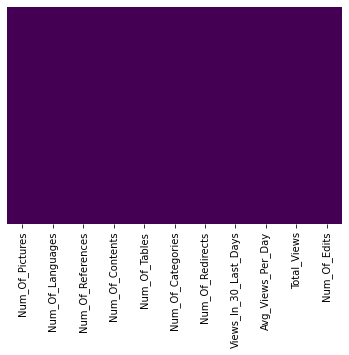

In [26]:
sns.heatmap(WikiData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Lets see the frequent value of each column

In [27]:
df3 = df2.copy()
col_names = list(df3.columns)
frequent_val_list = []

for col in col_names:
    frequent_val = df3[col].value_counts().idxmax()
    frequent_val_list.append(frequent_val) 
    
frequents_df = pd.DataFrame({"col_name":col_names , "frequent_val":frequent_val_list})
    
frequents_df

col_name  frequent_val
0         Num_Of_Pictures      1.000000
1        Num_Of_Languages      0.000000
2       Num_Of_References      1.000000
3         Num_Of_Contents      0.000000
4           Num_Of_Tables      0.000000
5       Num_Of_Categories      3.000000
6        Num_Of_Redirects      0.000000
7   Views_In_30_Last_Days      0.000000
8       Avg_Views_Per_Day      2.383902
9             Total_Views    873.000000
10           Num_Of_Edits     11.000000

### Lets validate the number of values of each Columns

Num_Of_Pictures            11
Num_Of_Languages           18
Num_Of_References          29
Num_Of_Contents            13
Num_Of_Tables               3
Num_Of_Categories          22
Num_Of_Redirects            8
Views_In_30_Last_Days     436
Avg_Views_Per_Day        3230
Total_Views              3230
Num_Of_Edits              219
dtype: int64

 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

 0.0     2029
4.0      506
5.0      351
6.0      217
3.0      114
7.0      113
8.0       60
2.0       35
9.0       14
10.0       5
11.0       4
12.0       2
1.0        1
Name: Num_Of_Contents, dtype: int64


<AxesSubplot:>

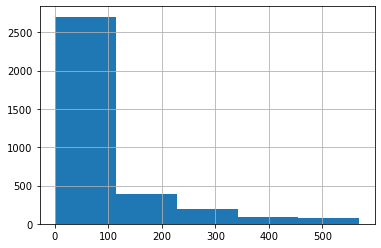

In [28]:
#Check how many different values there are in each column
print(df3.nunique())

#Check the values of the column Num_Of_Contents
list_values = sorted(set(df3['Num_Of_Contents'].unique()))
print("\n" ,list_values)

#Check how many times each value of a column appears in the rows
print("\n" , df3['Num_Of_Contents'].value_counts())

#See visually as a graph
df3['Views_In_30_Last_Days'].hist(bins=5)

# **EDA**

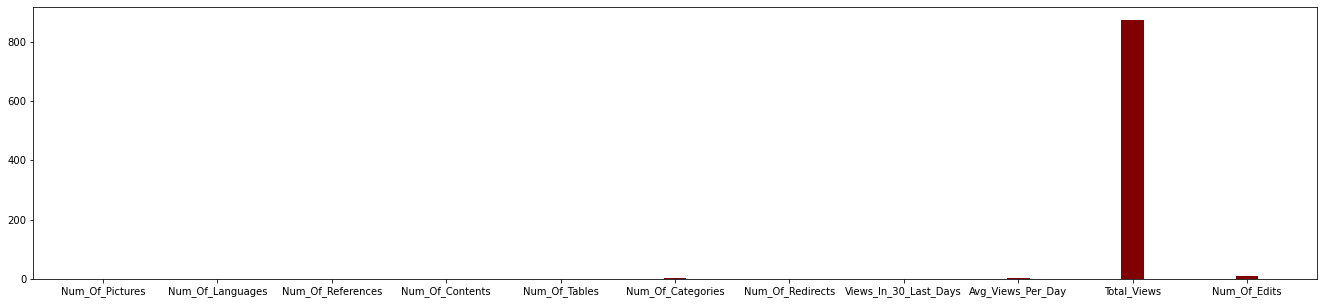

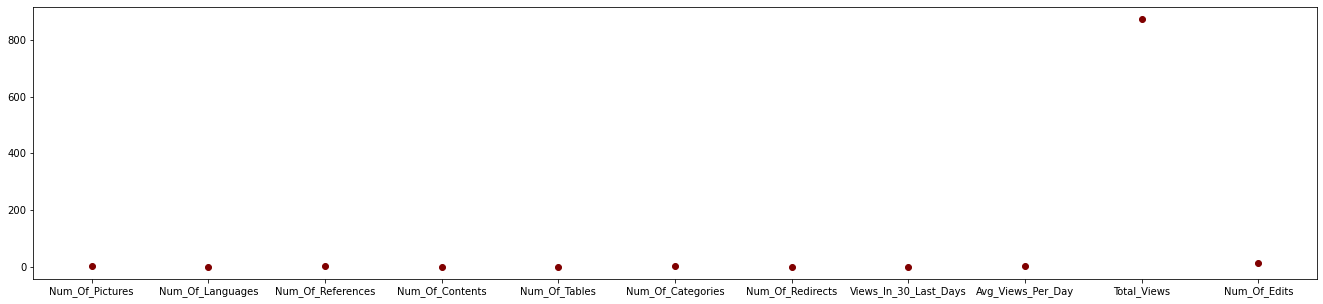

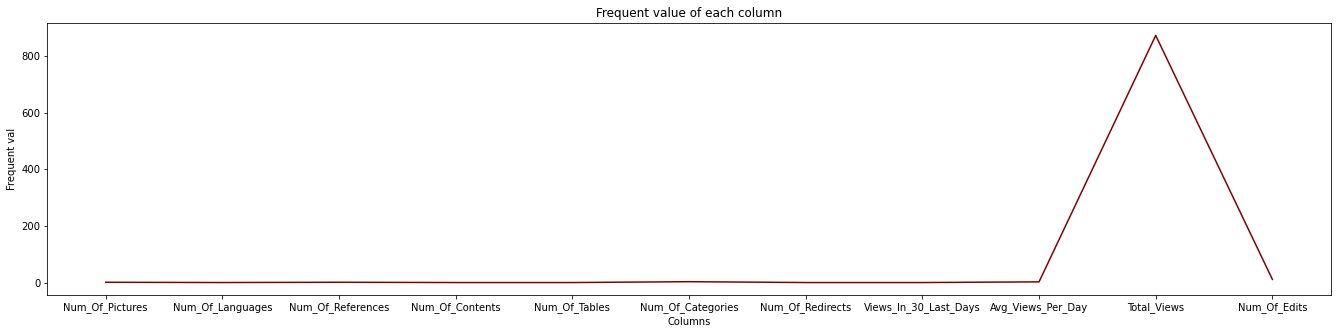

In [29]:
courses = col_names
values = frequent_val_list
  
fig = plt.figure(figsize = (23, 5))
 
# creating the bar
plt.bar(courses, values, color ='maroon', width = 0.2)

fig = plt.figure(figsize = (23, 5))

# creating the scatter
plt.scatter(courses, values, color ='maroon')

fig = plt.figure(figsize = (23, 5))

# creating the plot
plt.plot(courses, values, color ='maroon')

plt.xlabel("Columns")
plt.ylabel("Frequent val")
plt.title("Frequent value of each column")
plt.show()

### Visualization of the relationship between the columns

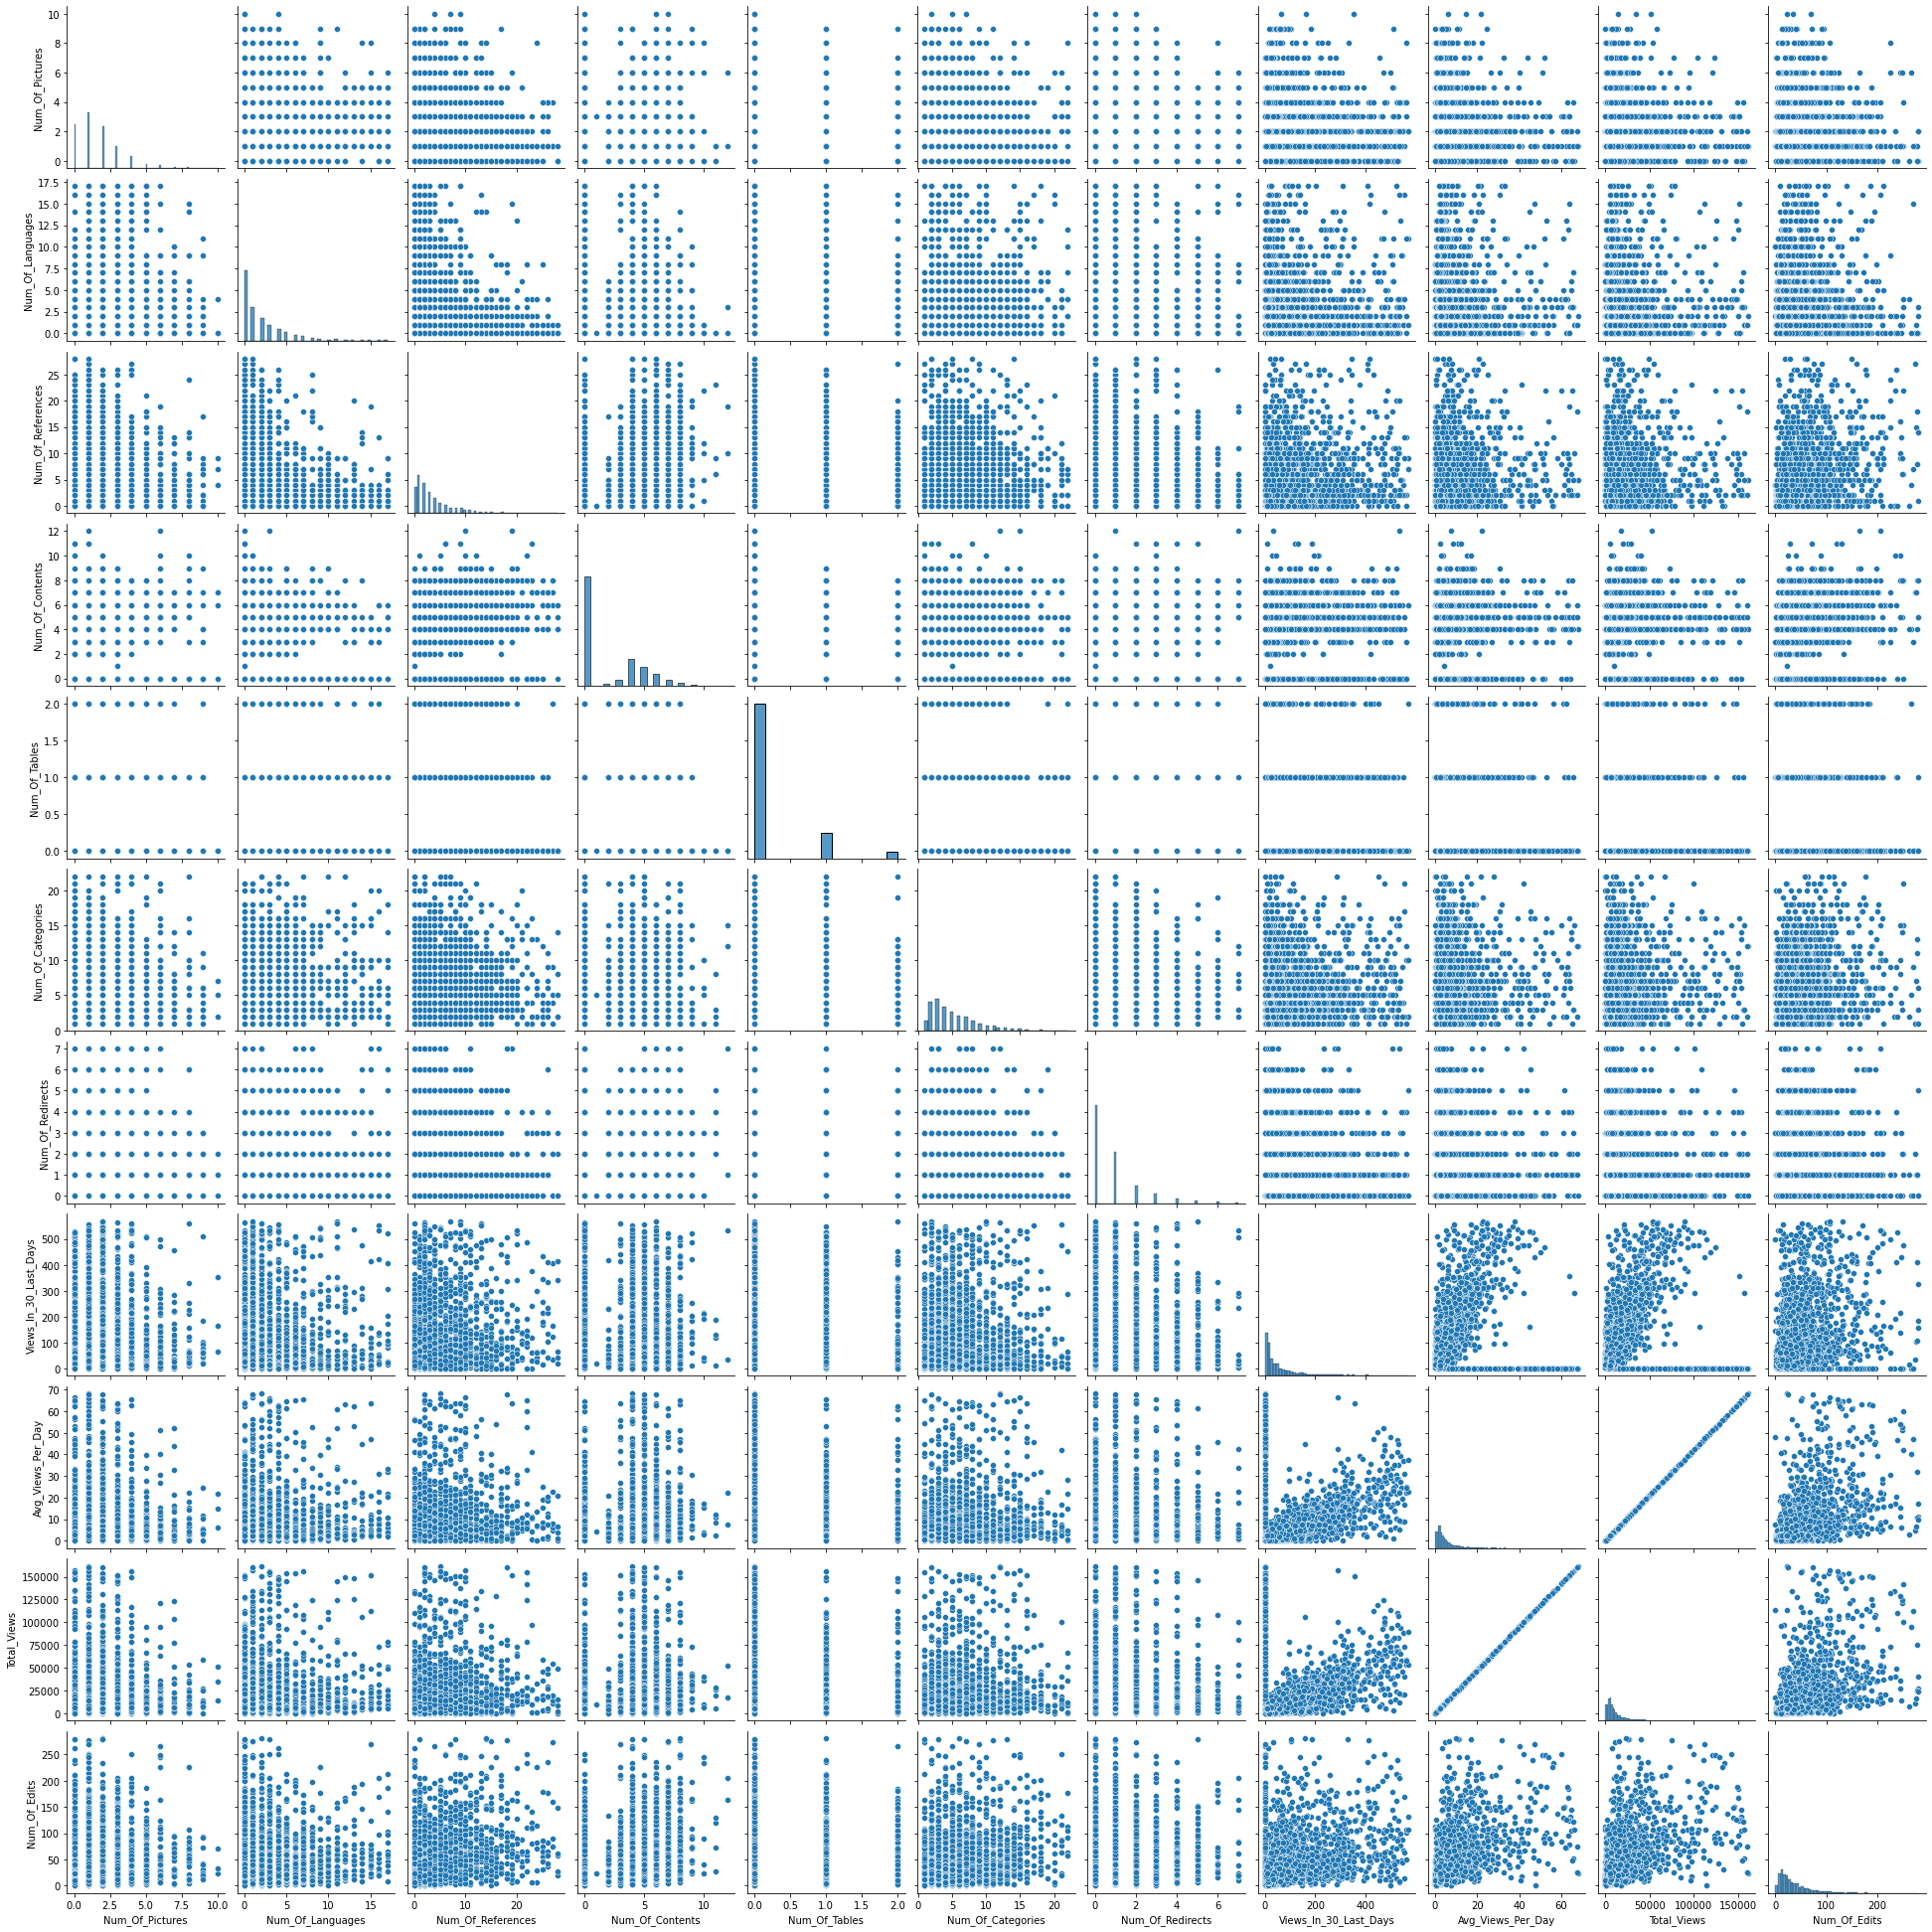

In [30]:
sns.pairplot(df3) #The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

<AxesSubplot:xlabel='Total_Views', ylabel='Density'>

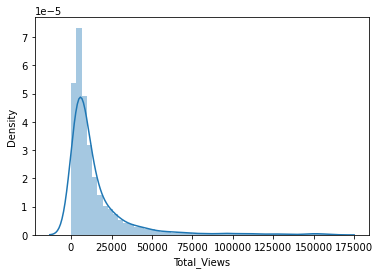

In [31]:
sns.distplot(df3['Total_Views'])

Index(['Num_Of_Pictures', 'Num_Of_Languages', 'Num_Of_References',
       'Num_Of_Contents', 'Num_Of_Tables', 'Num_Of_Categories',
       'Num_Of_Redirects', 'Views_In_30_Last_Days', 'Avg_Views_Per_Day',
       'Total_Views', 'Num_Of_Edits'],
      dtype='object')

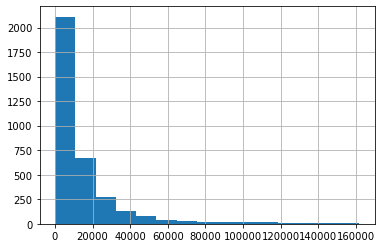

In [32]:
df3['Total_Views'].hist(bins=15)
df3.columns

<AxesSubplot:ylabel='Total_Views'>

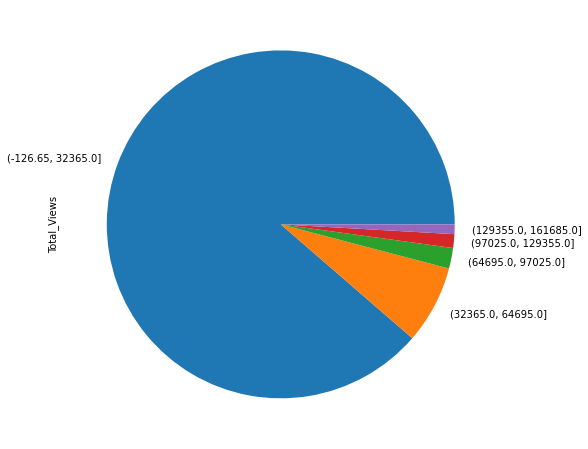

In [33]:
fig = plt.figure(figsize = (8, 8))
pd.cut(df3['Total_Views'], bins=5).value_counts().plot(kind='pie')

# Lets check the correlation between the features

Text(0.5, 1.0, 'Pearson Correlation')

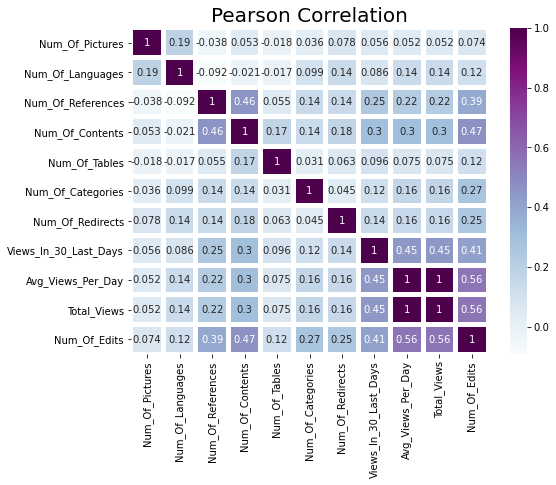

In [34]:
plt.figure(figsize=(8, 6))
colormap = plt.get_cmap('BuPu')
sns.heatmap(df3.corr(), cmap = colormap, linewidth = 4, annot=True)
plt.title('Pearson Correlation',size=20)

### There is a perfect correlation between: "Avg Views Per Day", "Total Views".

### Lets See:

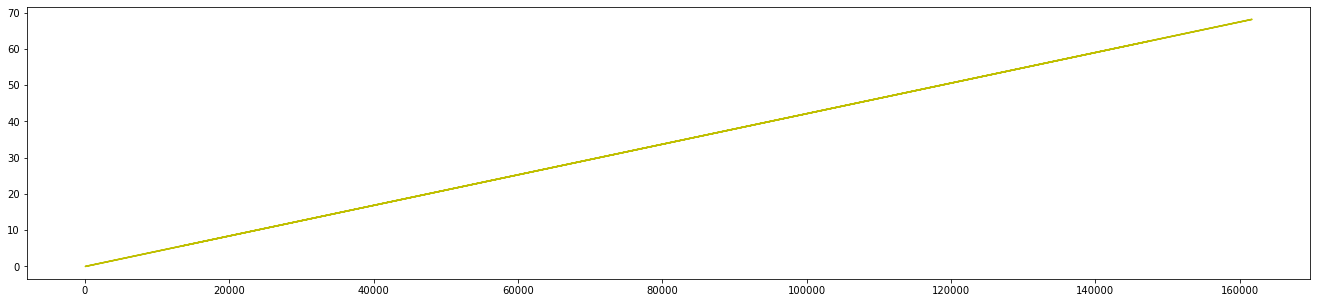

In [35]:
fig = plt.figure(figsize = (23, 5))


plt.plot(df3['Total_Views'],df3['Avg_Views_Per_Day'], 'y')


plt.show()

### Since "Total Views" label and "Avg Views Per Day" is two of the features, we will get a perfect model, therefore we delete the "Avg Views Per Day" column.

In [36]:
df4 = df3.drop(['Avg_Views_Per_Day'],axis=1)
print(df4.columns)

Index(['Num_Of_Pictures', 'Num_Of_Languages', 'Num_Of_References',
       'Num_Of_Contents', 'Num_Of_Tables', 'Num_Of_Categories',
       'Num_Of_Redirects', 'Views_In_30_Last_Days', 'Total_Views',
       'Num_Of_Edits'],
      dtype='object')


### Now let's see which other columns have a high correlation (more then 0.5)

In [37]:
def get_highly_correlated_cols(df):
    
    new_df = df.corr()
    i_col=0 
    i_row=0
    row_max = -1
    i_max = 0
    correlations = list()
    tuple_arr = list()
    
    for index,rows in new_df.iterrows():
        for row in rows: 
            if row != index and row > row_max and row != 1.0: 
                row_max = row
                i_max = i_row
            i_row+=1
               
        
        if (row_max >= 0.5) and ((i_max,i_col) not in tuple_arr) and (i_col < i_max):
            tuple_arr.append((i_col,i_max))
            correlations.append(row_max)
        
        row_max=-1
        i_col+=1 
        i_row=0
        i_max = 0
    
    return correlations, tuple_arr


In [38]:
correlations, tuple_arr = get_highly_correlated_cols(df4)


col_list = df4.columns
i=0

for tupel in tuple_arr:
    
    print("•",col_list[tupel[0]], "and", col_list[tupel[1]], "have a high correlation:" , correlations[i], "\n")
    i += 1


• Total_Views and Num_Of_Edits have a high correlation: 0.5623141992470798 



### The high correlations in plots:

<AxesSubplot:xlabel='Num_Of_Edits'>

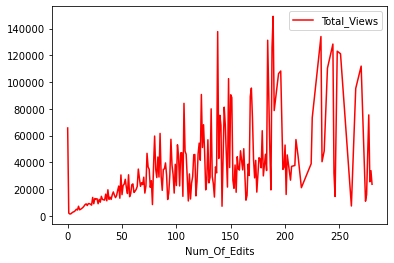

In [39]:
plots = df3.groupby('Num_Of_Edits').mean()[['Total_Views']]
plots.plot(color = 'r')

### The relationship between the two columns in 3D:

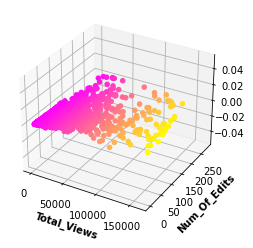

In [40]:
ax= plt.axes(projection = '3d')

xdata = df4.Total_Views
ydata = df4.Num_Of_Edits

color_map = plt.get_cmap('spring')

ax.scatter3D(xdata, ydata, c = (xdata+ydata), cmap = color_map, depthshade = False)

ax.set_xlabel('Total_Views', fontweight ='bold')
ax.set_ylabel('Num_Of_Edits', fontweight ='bold')

plt.show()

# Machine learning:
### Split Data

In [41]:
df4.columns

Index(['Num_Of_Pictures', 'Num_Of_Languages', 'Num_Of_References',
       'Num_Of_Contents', 'Num_Of_Tables', 'Num_Of_Categories',
       'Num_Of_Redirects', 'Views_In_30_Last_Days', 'Total_Views',
       'Num_Of_Edits'],
      dtype='object')

In [42]:
target_column = 'Total_Views'

y = df4[target_column]
X = df4.drop([target_column],axis=1)


print(X.shape)
print(y.shape)

(3451, 9)
(3451,)


### Split to train and test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Shapes:")
print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("\nY Shapes:")
print("Target distribution in original dataset: #{}".format(y.shape[0]))
print("Target distribution in the training set: #{}".format(y_train.shape[0]))
print("Target distribution in the test set: #{}".format(y_test.shape[0]))


X Shapes:
Initial amount of samples: #3451
Number of training samples: #2760
Number of test samples: #691

Y Shapes:
Target distribution in original dataset: #3451
Target distribution in the training set: #2760
Target distribution in the test set: #691


### Split to train and validation

In [44]:
X_train_new, X_valid, y_train_new, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("X Shapes:")
print("Initial amount of samples: #{}".format(X_train.shape[0]))
print("Number of training samples: #{}".format(X_train_new.shape[0]))
print("Number of validation samples: #{}".format(X_valid.shape[0]))

print("\nY Shapes:")
print("Target distribution in original dataset: #{}".format(y_train.shape[0]))
print("Target distribution in the training set: #{}".format(y_train_new.shape[0]))
print("Target distribution in the validation set: #{}".format(y_valid.shape[0]))

X_train_new.head()

X Shapes:
Initial amount of samples: #2760
Number of training samples: #2208
Number of validation samples: #552

Y Shapes:
Target distribution in original dataset: #2760
Target distribution in the training set: #2208
Target distribution in the validation set: #552


Num_Of_Pictures  Num_Of_Languages  Num_Of_References  Num_Of_Contents  \
2728              6.0               9.0                0.0              0.0   
747               3.0               0.0                1.0              0.0   
1293              6.0               0.0                1.0              5.0   
832               2.0               3.0                3.0              4.0   
3158              0.0               2.0                9.0              0.0   

      Num_Of_Tables  Num_Of_Categories  Num_Of_Redirects  \
2728            1.0                2.0               0.0   
747             0.0                3.0               1.0   
1293            0.0                3.0               0.0   
832             0.0               13.0               0.0   
3158            0.0               11.0               0.0   

      Views_In_30_Last_Days  Num_Of_Edits  
2728                   54.0          32.0  
747                    17.0          10.0  
1293                    9.0          18.0  
832                    32.0          21.0  
3158                   85.0          43.0

## **Creating and Training the Model - Decision Tree Regressor** 

In [45]:
#DecisionTreeRegressor

#creating
model = DecisionTreeRegressor(max_depth=5,max_features=None, max_leaf_nodes=15, random_state=0) 

#training
model = model.fit(X_train_new,y_train_new)


## **Train predictions**

In [46]:
y_pred = model.predict(X_valid)


score = model.score(X_train_new,y_train_new)
print("Training score:", score)



evaluate_value = metrics.r2_score(y_valid,y_pred)
print("r2_score", evaluate_value) 


rmse = math.sqrt(mean_squared_error(y_valid, y_pred)) 
print(f"Root Mean Squared Error of the model : {rmse:.3f}")


Training score: 0.8029622393275099
r2_score 0.6721678370140548
Root Mean Squared Error of the model : 13467.640


## **Test predictions**

In [47]:
predictions = model.predict(X_test)

evaluate_value = metrics.r2_score(y_test,predictions)
print("r2_score", evaluate_value)

rmse = math.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error of the model : {rmse:.3f}")


r2_score 0.7323914884540892
Root Mean Squared Error of the model : 11971.044


### We want to know how far off are the predictions from the tests edits the actual edits

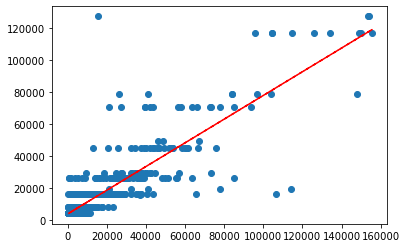

In [48]:
plt.scatter(y_test,predictions)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")

plt.show()

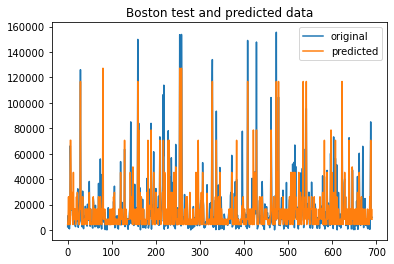

In [49]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predictions, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

## **Residual Histogram**

Text(0.5, 1.0, 'Residual Prediction Histogram')

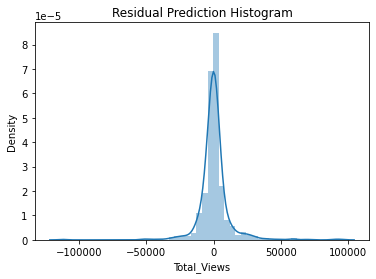

In [50]:
sns.distplot((y_test-predictions),bins=50); # The goal: need to be around zero
plt.title('Residual Prediction Histogram')

#### As we can see, the Residual Prediction Histogram mean is around zero, which suggest the model manage to predict accurately.

## **Regression Evaluation Metrics**

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6126.086494692062
MSE: 143305891.41615692
RMSE: 11971.043873286779


# **Model - Training a Logistic Regression Model**

### First, we check what the average of our prediction value is:

In [52]:
df4['Total_Views'].mean()

15645.489133584468

## **Preproccess**

### For the y label any value above the mean (15645) will get 1 otherwise, 0.

In [53]:
df5 = df4.copy()

df5['Total_Views'] = df5['Total_Views'].apply(lambda x: 1 if x>df5['Total_Views'].mean() else 0) 

In [54]:
df5['Total_Views'].value_counts()

0    2515
1     936
Name: Total_Views, dtype: int64

In [55]:
df5.head()

Num_Of_Pictures  Num_Of_Languages  Num_Of_References  Num_Of_Contents  \
0              1.0               2.0                1.0              6.0   
1              2.0               3.0                3.0              5.0   
4              0.0               2.0                1.0              5.0   
6              0.0               0.0                1.0              0.0   
7              1.0               4.0                7.0              0.0   

   Num_Of_Tables  Num_Of_Categories  Num_Of_Redirects  Views_In_30_Last_Days  \
0            0.0                5.0               0.0                   27.0   
1            0.0               13.0               2.0                   77.0   
4            0.0                9.0               1.0                   29.0   
6            0.0                4.0               0.0                   17.0   
7            0.0               12.0               1.0                   84.0   

   Total_Views  Num_Of_Edits  
0            0          25.0  
1            0          18.0  
4            0          38.0  
6            0          11.0  
7            0          31.0

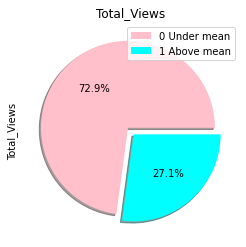

In [56]:
labels = ['0 Under mean', '1 Above mean']
df5['Total_Views'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors = ("pink", "cyan"), legend=True, title='Total_Views', labeldistance=None) # Count the number of 1 and the number of 0
plt.legend(labels)

### As we can see, most of the observations are below the "Total_Views" mean.

# **EDA**

Text(0.5, 1.0, 'Total_Views Distribution')

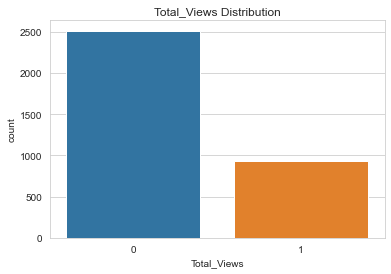

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='Total_Views',data=df5)
plt.title('Total_Views Distribution')

### Split Data

In [58]:
target_column = 'Total_Views'

y = df5[target_column]
X = df5.drop([target_column],axis=1)


print(X.shape)
print(y.shape)

(3451, 9)
(3451,)


In [59]:
df5.head()

Num_Of_Pictures  Num_Of_Languages  Num_Of_References  Num_Of_Contents  \
0              1.0               2.0                1.0              6.0   
1              2.0               3.0                3.0              5.0   
4              0.0               2.0                1.0              5.0   
6              0.0               0.0                1.0              0.0   
7              1.0               4.0                7.0              0.0   

   Num_Of_Tables  Num_Of_Categories  Num_Of_Redirects  Views_In_30_Last_Days  \
0            0.0                5.0               0.0                   27.0   
1            0.0               13.0               2.0                   77.0   
4            0.0                9.0               1.0                   29.0   
6            0.0                4.0               0.0                   17.0   
7            0.0               12.0               1.0                   84.0   

   Total_Views  Num_Of_Edits  
0            0          25.0  
1            0          18.0  
4            0          38.0  
6            0          11.0  
7            0          31.0

### Split to train, test and validation

In [60]:
#train - test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#train - validation
X_train_new, X_valid, y_train_new, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## **Creating and Training the Model - Logistic Regression** 

In [61]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train_new, y_train_new)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [62]:
pipe.score(X_train_new, y_train_new)

0.8638716356107661

## **Train predictions**

In [63]:
y_pred = pipe.predict(X_valid)


print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       361
           1       0.81      0.70      0.75       122

    accuracy                           0.88       483
   macro avg       0.86      0.82      0.84       483
weighted avg       0.88      0.88      0.88       483



## **Test predictions**

In [64]:
predictions = pipe.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       748
           1       0.81      0.67      0.73       288

    accuracy                           0.86      1036
   macro avg       0.84      0.80      0.82      1036
weighted avg       0.86      0.86      0.86      1036



### The actual confusin matrix to evalute the model

In [65]:
confusion_matrix(y_test, predictions)

array([[702,  46],
       [ 96, 192]], dtype=int64)

# **Model - KNN**

## Standardize the Variables

### Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [66]:
df5.head()

Num_Of_Pictures  Num_Of_Languages  Num_Of_References  Num_Of_Contents  \
0              1.0               2.0                1.0              6.0   
1              2.0               3.0                3.0              5.0   
4              0.0               2.0                1.0              5.0   
6              0.0               0.0                1.0              0.0   
7              1.0               4.0                7.0              0.0   

   Num_Of_Tables  Num_Of_Categories  Num_Of_Redirects  Views_In_30_Last_Days  \
0            0.0                5.0               0.0                   27.0   
1            0.0               13.0               2.0                   77.0   
4            0.0                9.0               1.0                   29.0   
6            0.0                4.0               0.0                   17.0   
7            0.0               12.0               1.0                   84.0   

   Total_Views  Num_Of_Edits  
0            0          25.0  
1            0          18.0  
4            0          38.0  
6            0          11.0  
7            0          31.0

In [67]:
scaler = StandardScaler() #removes the mean and scales each feature to unit variance

In [68]:
scaler.fit(df5.drop('Total_Views',axis=1))

StandardScaler()

In [69]:
scaled_features = scaler.transform(df5.drop('Total_Views',axis=1))

In [70]:
WikiData_scaled = pd.DataFrame(scaled_features,columns=df5.columns[:-1]) #removed the last column 'Total_Views' = y

### Split Data

In [71]:
target_column = 'Total_Views'

y = df5[target_column]
X = df5.drop([target_column],axis=1)


print(X.shape)
print(y.shape)

(3451, 9)
(3451,)


### Split to train, test and validation

In [72]:
#train - test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#train - validation
X_train_new, X_valid, y_train_new, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Using KNN

In [73]:
knn = KNeighborsClassifier(n_neighbors=1)

In [74]:
knn.fit(X_train_new, y_train_new)

KNeighborsClassifier(n_neighbors=1)

## **Train predictions**

In [75]:
y_pred = knn.predict(X_valid)

print(confusion_matrix(y_valid,y_pred))

[[324  37]
 [ 28  94]]


## **Test predictions**

In [76]:
predictions = knn.predict(X_test)

print(confusion_matrix(y_test,predictions))

[[679  69]
 [ 78 210]]


## Choosing a K Value
Now we are going to pick a good K Value:

In [77]:
k_s=[]
train_accuracies=[]
test_accuracies=[]
for k in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    y_pred_train=clf.predict(X_train)
    y_pred=clf.predict(X_test)
    k_s.append(k)
    train_accuracies.append(metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
    test_accuracies.append(metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

df=pd.DataFrame({"k":k_s,"train_accuracy":train_accuracies,"test_accuracy":test_accuracies})
df

k  train_accuracy  test_accuracy
0    1        1.000000       0.860039
1    2        0.923810       0.860039
2    3        0.929607       0.889961
3    4        0.914700       0.889961
4    5        0.917184       0.885135
5    6        0.907660       0.888031
6    7        0.910973       0.888031
7    8        0.903520       0.882239
8    9        0.903106       0.886100
9   10        0.901035       0.889961
10  11        0.898965       0.893822
11  12        0.898551       0.893822
12  13        0.897723       0.894788
13  14        0.897723       0.895753
14  15        0.897308       0.890927
15  16        0.899379       0.894788
16  17        0.899379       0.893822
17  18        0.898137       0.891892
18  19        0.898551       0.894788
19  20        0.898551       0.892857

In [78]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

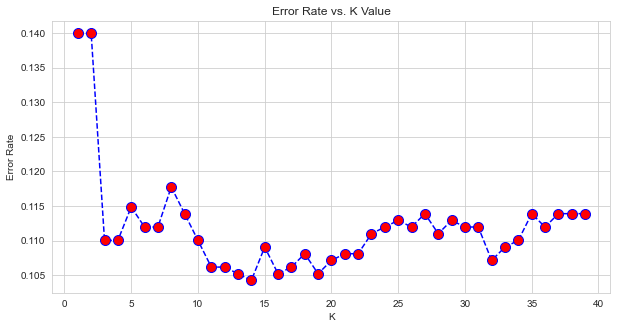

In [79]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [80]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[682  66]
 [ 79 209]]


              precision    recall  f1-score   support

           0       0.90      0.91      0.90       748
           1       0.76      0.73      0.74       288

    accuracy                           0.86      1036
   macro avg       0.83      0.82      0.82      1036
weighted avg       0.86      0.86      0.86      1036



In [81]:
# NOW WITH K=14
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=14')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=14


[[700  48]
 [ 60 228]]


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       748
           1       0.83      0.79      0.81       288

    accuracy                           0.90      1036
   macro avg       0.87      0.86      0.87      1036
weighted avg       0.89      0.90      0.90      1036



### We were able to squeeze some more performance out of our model by tuning to a better K value!

# **Thank you !**